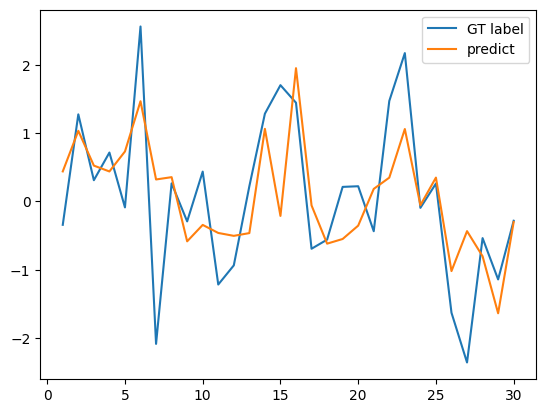

loss값 0.1596599754002752


In [37]:
# 미니프로젝트 1-1번

import numpy as np
import matplotlib.pyplot as plt

N = 30 #개수
D = 12 #차원

# 가우시안 분포를 가짐 평균은 0, 분산은1
x = np.random.randn(N, D)
one = np.ones((N, 1)) 
x_b = np.concatenate((x, one), axis=1)

# 평균은 0 분산은 1
y = np.random.randn(N, 1)

# normal equation으로 y 구하기
w_ne = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y) # normal equation 수식 
y_pred_ne = np.dot(x_b, w_ne)
l2_distance= np.sqrt(np.sum(np.square(y-y_pred_ne)))/N # 직접 계산
x_cordi=np.arange(1,N+1) #차원이 여러개 이기 때문에 X 좌표 역할이 되는 x값 필요
plt.plot(x_cordi,y,label="GT label")
plt.plot(x_cordi,y_pred_ne,label="predict")
plt.legend()
plt.show()
print("loss값",l2_distance)

3634 번째 수렴
0.16051825946815718


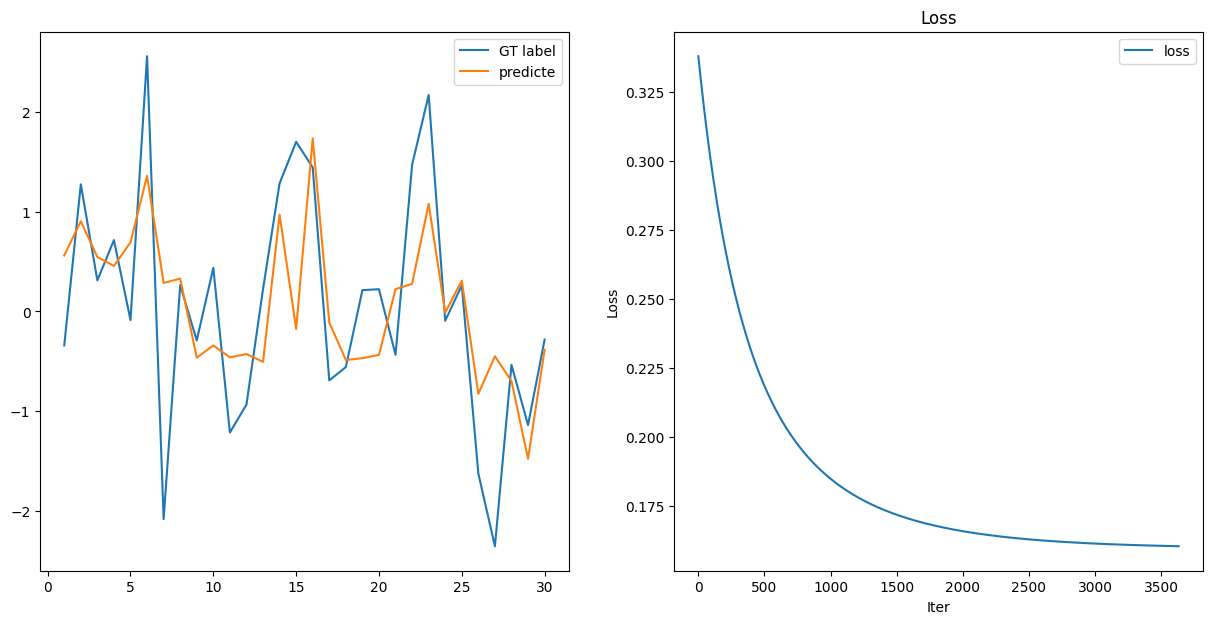

In [38]:
#미니프로젝트 1-2
# 4번에서 한번에 비교를 위해 초기값은 위에 값을 그대로 설정 가중치만 조절
w_gd = np.random.randn(D + 1, 1)
iter = 100000
lr = 0.001 
break_num=1e-6

Loss_list = [] # loss값 담고 전 값과 비교

#iteration 루프
for i in range(iter):
  y_pred_gd = x_b.dot(w_gd)
  L = np.sqrt(np.sum(np.square(y-y_pred_gd))) / N #L2norm
  Loss_list.append(L) #list 생성
  g = -(2 / N) * (y-y_pred_gd).T.dot(x_b) # grad 구하기
  w_gd = w_gd - lr*(g.T)
# 전 loss와 차이 안나면 멈추기
  if ((i > 0) and (abs(Loss_list[-2]- Loss_list[-1]) < break_num)):
      break

# 결과 출력
print(len(Loss_list),"번째 수렴")
print(Loss_list[-1])

fig = plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
plt.plot(x_cordi, y, label='GT label')
plt.plot(x_cordi, y_pred_gd, label='predicte')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Loss_list, label='loss')
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

plt.show()

21759 번째 수렴
0.16451239102723716


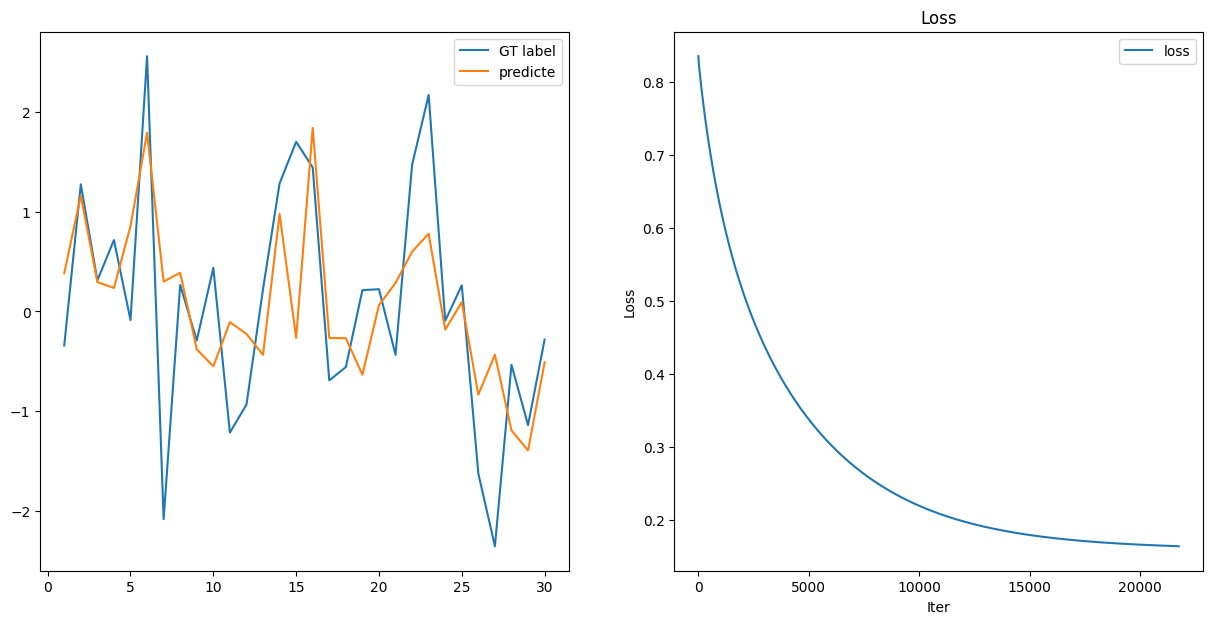

In [39]:
# 미니프로젝트 1-7
# 초기 가중치 설정
w_my = np.random.randn(D + 1, 1)
Loss_list = [] # loss값 담고 전 값과 비교
delta=1e-8
grad_squared=0

#iteration 루프
for i in range(1,iter):
  y_pred_my = x_b.dot(w_my)
  L1 = np.sqrt(np.sum(np.square(y-y_pred_my))) / N 
  Loss_list.append(L1) #list 생성
  g = -(2 / N) * (y-y_pred_my).T.dot(x_b)
  grad_squared += g*g/i
  w_my = w_my - (lr*g.T/(delta+np.sqrt(grad_squared.T)))

  if ((i > 1) and (abs(Loss_list[-2]- Loss_list[-1]) < break_num)):
      break

print(len(Loss_list),"번째 수렴")
print(Loss_list[-1])

fig = plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
plt.plot(x_cordi, y, label='GT label')
plt.plot(x_cordi, y_pred_my, label='predicte')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Loss_list, label='loss')
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

plt.show()

100000 번째 수렴
0.5086387859123583


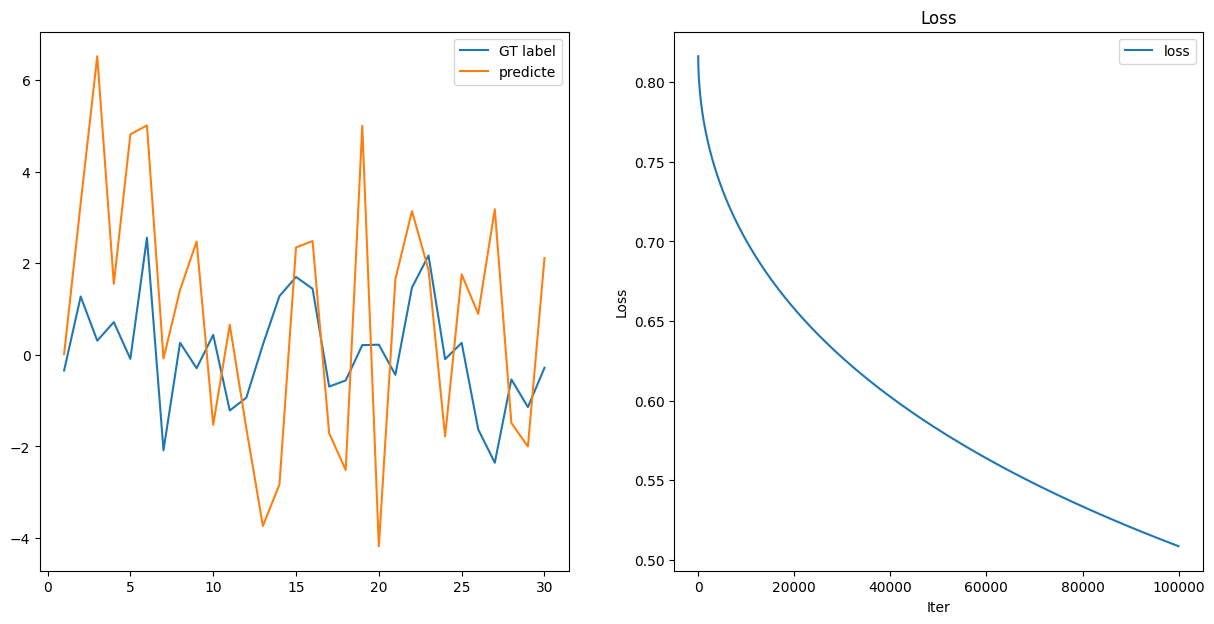

In [40]:
# 미니프로젝트 1-3
# 초기 가중치 설정
w_adag = np.random.randn(D + 1, 1)
Loss_list = [] # loss값 담고 전 값과 비교
delta=1e-8
grad_squared=0

#iteration 루프
for i in range(iter):
  y_pred_adag = x_b.dot(w_adag)
  L1 = np.sqrt(np.sum(np.square(y-y_pred_adag))) / N 
  Loss_list.append(L1) #list 생성
  g = -(2 / N) * (y-y_pred_adag).T.dot(x_b)
  grad_squared += g*g
  w_adag = w_adag - (lr*g.T/(delta+np.sqrt(grad_squared.T)))

  if ((i > 0) and (abs(Loss_list[-2]- Loss_list[-1]) < break_num)):
      break

print(len(Loss_list),"번째 수렴")
print(Loss_list[-1])

fig = plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
plt.plot(x_cordi, y, label='GT label')
plt.plot(x_cordi, y_pred_adag, label='predicte')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Loss_list, label='loss')
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

plt.show()

1983 번째 수렴
0.1322397480463168


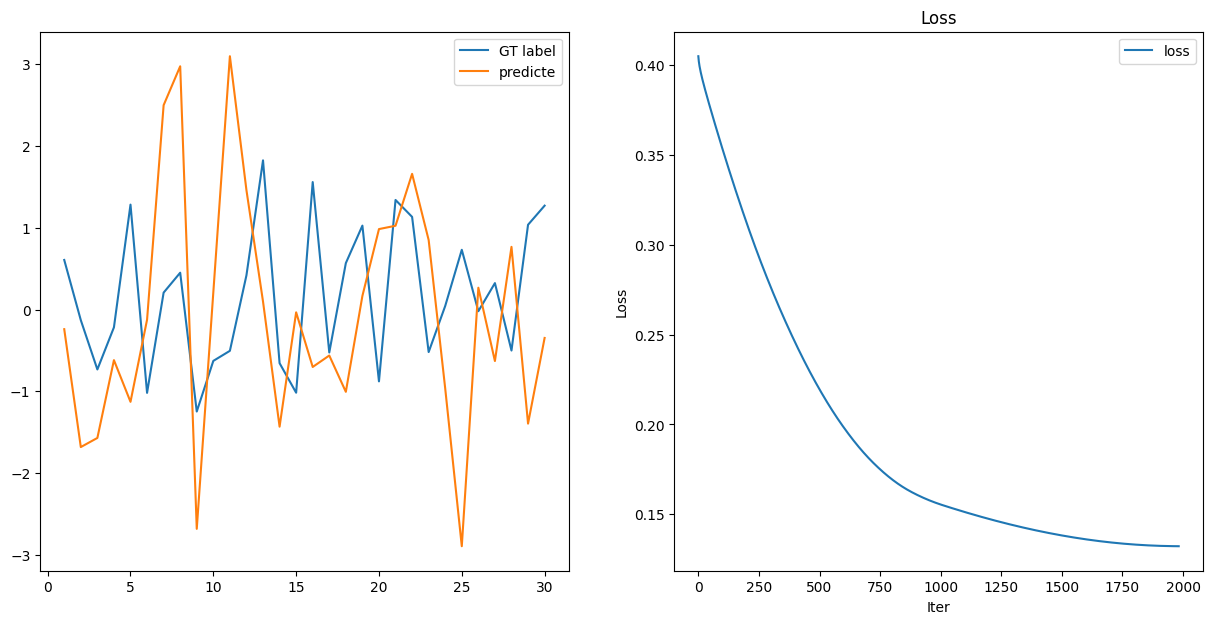

In [19]:
# 미니프로젝트 1-3
# 초기 가중치 설정
w_RMSP = np.random.randn(D + 1, 1)
Loss_list = [] # loss값 담고 전 값과 비교
delta=1e-8
grad_squared=0
decay=0.9
#iteration 루프
for i in range(iter):
  y_pred_RMSP = x_b.dot(w_RMSP)
  L2 = np.sqrt(np.sum(np.square(y-y_pred_RMSP))) / N 
  Loss_list.append(L2) #list 생성
  g = -(2 / N) * (y-y_pred_RMSP).T.dot(x_b)
  grad_squared = decay*grad_squared+(1-decay)*g*g
  w_RMSP = w_RMSP - (lr*g.T/(delta+np.sqrt(grad_squared.T)))

  if ((i > 0) and (abs(Loss_list[-2]- Loss_list[-1]) < break_num)):
      break

print(len(Loss_list),"번째 수렴")
print(Loss_list[-1])

fig = plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
plt.plot(x_cordi, y, label='GT label')
plt.plot(x_cordi, y_pred_adag, label='predicte')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Loss_list, label='loss')
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

plt.show()

4643 번째 수렴
0.13256816057572193


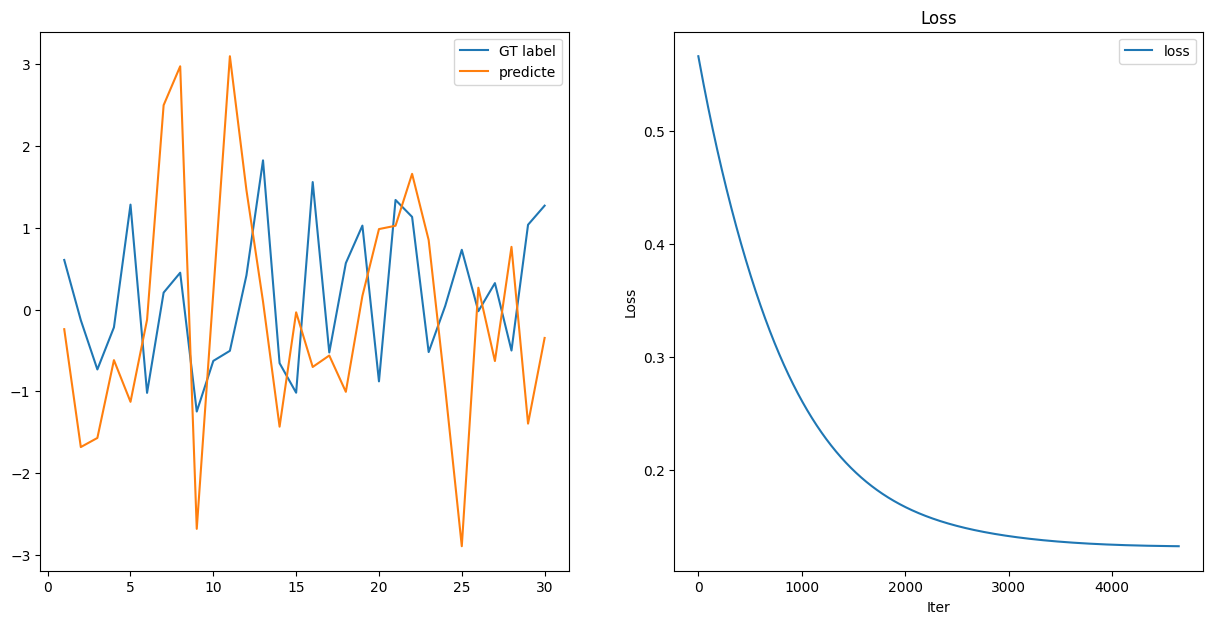

In [20]:
# 미니프로젝트 1-3
# 초기 가중치 설정
w_adam = np.random.randn(D + 1, 1)
Loss_list = [] # loss값 담고 전 값과 비교
delta=1e-7
first_moment = 0
second_moment = 0
beta1=0.9
beta2=0.999
#iteration 루프
for i in range(1, iter):
  y_pred_adam = np.dot(x_b, w_adam)
  L3 = np.sqrt(np.sum(np.square(y-y_pred_adam))) / N #L2norm
  Loss_list.append(L3) #list 생성
  g = -(2 / N) * np.dot(((y-y_pred_adam).T), x_b)
  first_moment=beta1*first_moment+(1-beta1)*g
  second_moment=beta2*second_moment+(1-beta2)*g*g
  first_unbias=first_moment/(1-beta1**i)
  second_unbias=second_moment/(1-beta2**i)
  w_adam = w_adam - (lr*first_unbias.T/(delta+np.sqrt(second_unbias.T)))

  if ((i > 1) and (abs(Loss_list[-2]- Loss_list[-1])) < break_num):
      break

print(len(Loss_list),"번째 수렴")
print(Loss_list[-1])

fig = plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
plt.plot(x_cordi, y, label='GT label')
plt.plot(x_cordi, y_pred_adag, label='predicte')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Loss_list, label='loss')
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

plt.show()

normal equation 가중치 [[ 0.20670606 -0.10086131 -0.04843246 -0.26191152  0.08471975 -0.07715217
   0.10214781 -0.16067287  0.17815102  0.24176188  0.10634978 -0.08301957
   0.08548383]]
gradient descent 가중치 [[ 0.22878505 -0.00740174 -0.11469136 -0.16997959  0.09296477 -0.16078331
   0.08499351 -0.06610798  0.18106641  0.30658775  0.13762058 -0.00683259
   0.10715079]]
adagram 가중치 [[ 0.28392017  0.54578866  0.25093455 -0.69050782  0.2193939  -0.0628574
  -0.18428101 -0.01033395 -0.02299398 -0.58413091 -0.43636021 -0.34133338
  -0.13650488]]
RMSProp 가중치 [[ 0.21356301 -0.10386136 -0.04526186 -0.26066174  0.0841444  -0.0705585
   0.10339379 -0.16188625  0.18953285  0.21785041  0.10078943 -0.09096664
   0.0887265 ]]
adam 가중치 [[ 0.14665959 -0.09657539 -0.04957265 -0.27740691  0.08655058 -0.10146582
   0.09876577 -0.16300457  0.11795892  0.33881067  0.12471722 -0.04000172
   0.06979685]]


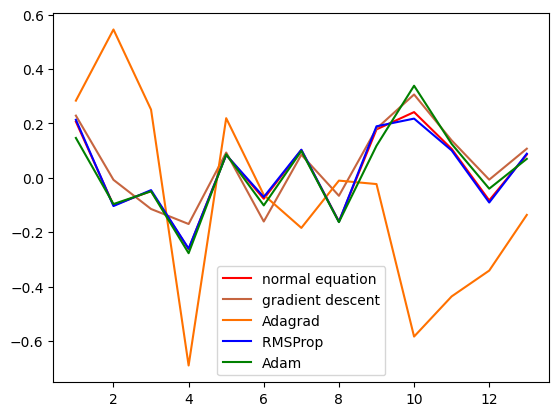

In [21]:
#미니프로젝트 1-5
print("normal equation 가중치", w_ne.T)
print("gradient descent 가중치", w_gd.T)
print("adagram 가중치", w_adag.T)
print("RMSProp 가중치", w_RMSP.T)
print("adam 가중치", w_adam.T)
x_cordi2=np.arange(1,D+2)
plt.plot(x_cordi2, w_ne,label="normal equation", color='r')
plt.plot(x_cordi2, w_gd, label='gradient descent', color='#C66540')
plt.plot(x_cordi2, w_adag, label='Adagrad', color='#FF7100')
plt.plot(x_cordi2, w_RMSP, label='RMSProp ', color='b')
plt.plot(x_cordi2, w_adam, label='Adam', color='g')
plt.legend()
plt.show()

normal equation loss값 0.13222289811140087
gradient descent loss값 0.13344578451529493
adagram loss값 0.3037446999548169
RMSProp loss값 0.1322397480463168
adam loss값 0.13256816057572193


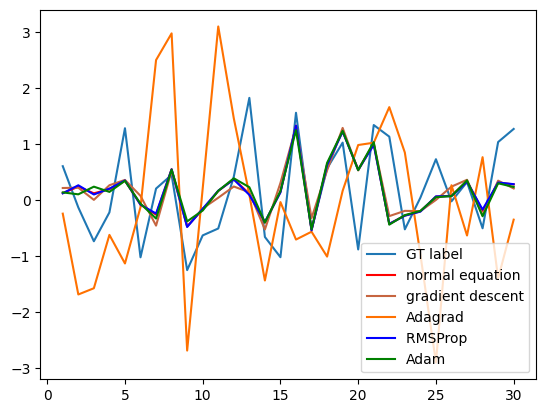

In [22]:
#미니프로젝트 1-5
print("normal equation loss값",l2_distance)
print("gradient descent loss값",L)
print("adagram loss값" , L1)
print("RMSProp loss값" , L2)
print("adam loss값" , L3)
plt.plot(x_cordi, y, label='GT label')
plt.plot(x_cordi,y_pred_ne,label="normal equation", color='r')
plt.plot(x_cordi, y_pred_gd, label='gradient descent', color='#C66540')
plt.plot(x_cordi, y_pred_adag, label='Adagrad', color='#FF7100')
plt.plot(x_cordi, y_pred_RMSP, label='RMSProp ', color='b')
plt.plot(x_cordi, y_pred_adam, label='Adam', color='g')
plt.legend()

101
0
마지막 theta1 값 -0.17014504305723133 마지막 theta2 값 0.04437800453514277


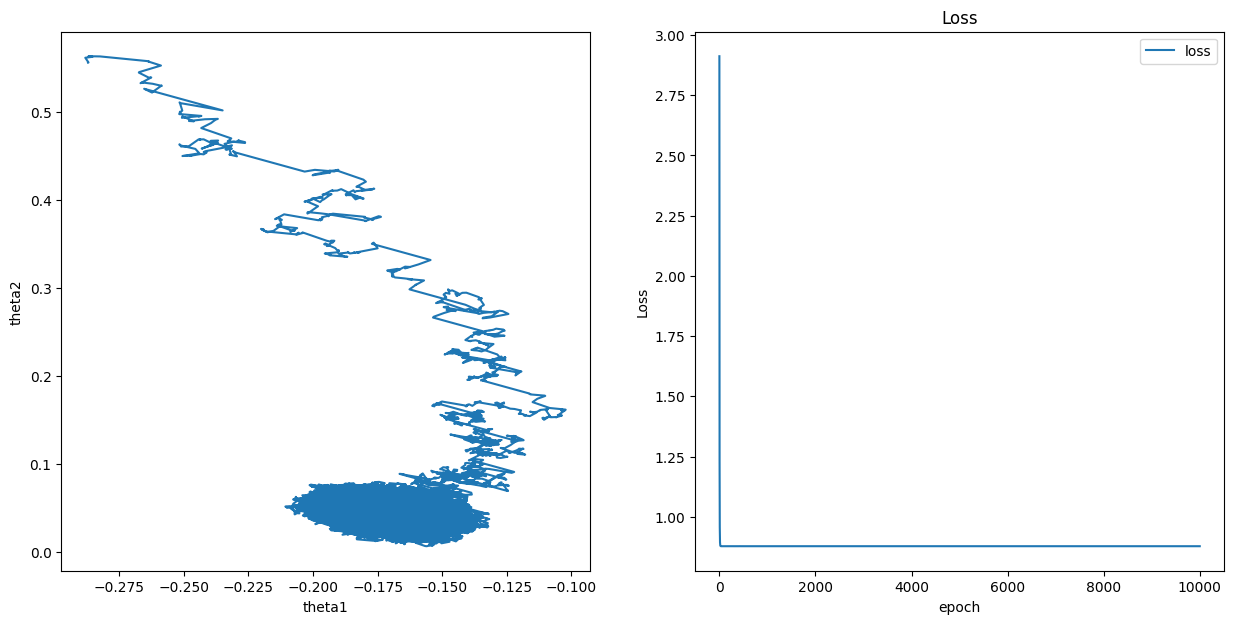

In [5]:
# 미니프로젝트 1-5
#기초 데이터 셋 만들기
N = 100
D = 10 
x=np.random.randn(N,D)
one = np.ones((N, 1))
x = np.concatenate((x, one), axis=1)
y = np.random.randn(N, 1)
w = np.random.randn(D+1, 1)
#셔플을 위한 0부터 N개까지의 숫자가 있는 넘파이리스트 나중에 인덱스 끼리 체인지 할 예정
numbers = np.arange(N)

# 하이퍼파라미터
lr = 0.001
batch_size = 1
epochs = 10000
break_num=1e-6

iternum = N // batch_size +1 #딱 나눠 안떨어 질 경우
last_index=N % batch_size
print(iternum)
print(last_index)
theta1_sgd=[]
theta2_sgd=[]
Loss_list = []
for epoch in range(epochs):
    shuffled_numbers = np.random.permutation(numbers)
    x=x[shuffled_numbers] #셔플한 인덱스 순서대로 바꿔줌
    y=y[shuffled_numbers] #셔플한 인덱스 순서대로 바꿔줌
    for batch_index in range(iternum):
        # 현재 배치의 시작과 끝 인덱스 계산
        # import pdb; pdb.set_trace()
        start_index = batch_index * batch_size
        if(last_index!=0 and batch_index==iternum-1):
          end_index=last_index
        else:
          end_index = (batch_index + 1) * batch_size
        # 현재 배치에서 손실과 기울기 계산
        x_batch = x[start_index:end_index]
        y_batch = y[start_index:end_index]
        y_pred = x_batch.dot(w)
        if(last_index!=0 and batch_index==iternum-1):
          batch_L = (np.sum((y_pred - y_batch) ** 2))/last_index
        else:
          batch_L = (np.sum((y_pred - y_batch) ** 2))/batch_size
        
        if(last_index!=0 and batch_index==iternum-1):
          g = -(2 / last_index) * np.dot((y_batch - y_pred).T, x_batch)
        else:
          g = -(2 / batch_size) * np.dot((y_batch - y_pred).T, x_batch)

        w -= lr * g.T

        theta1_sgd.append(w[0][0])
        theta2_sgd.append(w[1][0])
    
    y_pred = x.dot(w)
    loss = np.sum(np.square(y-y_pred))/N
    Loss_list.append(loss)
    # if ((epoch > 1) and (abs(Loss_list[-2]- Loss_list[-1])) < break_num):
    #   break

print("마지막 theta1 값", theta1_sgd[-1], "마지막 theta2 값",theta2_sgd[-1])
fig = plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
plt.plot(theta1_sgd, theta2_sgd)
plt.xlabel('theta1')
plt.ylabel('theta2')

plt.subplot(1,2,2)
plt.plot(Loss_list, label='loss')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

plt.show()

26
0
마지막 theta1 값 -0.17184923135854588 마지막 theta2 값 0.044750722490926084


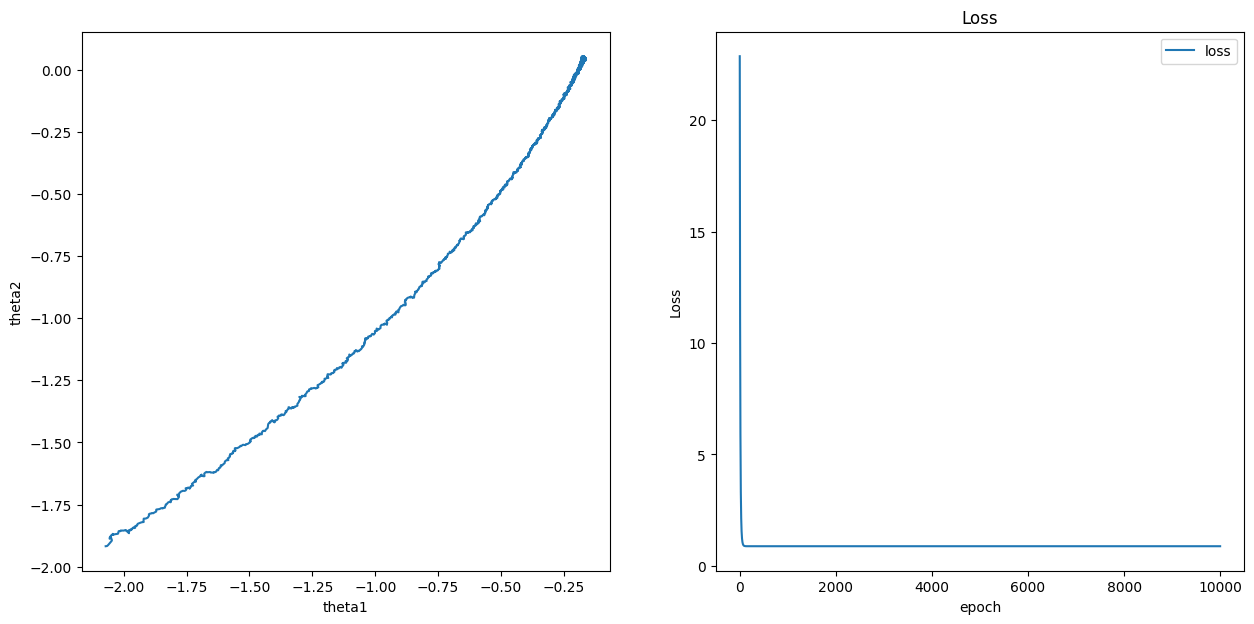

In [6]:
# 미니프로젝트 1-5
w1 = np.random.randn(D+1, 1)
#셔플을 위한 0부터 N개까지의 숫자가 있는 넘파이리스트 나중에 인덱스 끼리 체인지 할 예정

# 하이퍼파라미터
lr = 0.001
batch_size = 4
epochs = 10000
break_num=1e-6

iternum = N // batch_size +1 #딱 나눠 안떨어 질 경우
last_index=N % batch_size
print(iternum)
print(last_index)
theta1_mini=[]
theta2_mini=[]
Loss_list = []
for epoch in range(epochs):
    shuffled_numbers = np.random.permutation(numbers)
    x=x[shuffled_numbers] #셔플한 인덱스 순서대로 바꿔줌
    y=y[shuffled_numbers] #셔플한 인덱스 순서대로 바꿔줌
    for batch_index in range(iternum):
        # 현재 배치의 시작과 끝 인덱스 계산
        # import pdb; pdb.set_trace()
        start_index = batch_index * batch_size
        if(last_index!=0 and batch_index==iternum-1):
          end_index=last_index
        else:
          end_index = (batch_index + 1) * batch_size
        # 현재 배치에서 손실과 기울기 계산
        x_batch = x[start_index:end_index]
        y_batch = y[start_index:end_index]
        y_pred = x_batch.dot(w1)
        if(last_index!=0 and batch_index==iternum-1):
          batch_L = (np.sum((y_pred - y_batch) ** 2))/last_index
        else:
          batch_L = (np.sum((y_pred - y_batch) ** 2))/batch_size
        
        if(last_index!=0 and batch_index==iternum-1):
          g = -(2 / last_index) * np.dot((y_batch - y_pred).T, x_batch)
        else:
          g = -(2 / batch_size) * np.dot((y_batch - y_pred).T, x_batch)

        w1 -= lr * g.T

        theta1_mini.append(w1[0][0])
        theta2_mini.append(w1[1][0])
    
    y_pred = x.dot(w1)
    loss = np.sum(np.square(y-y_pred))/N
    Loss_list.append(loss)
    # if ((epoch > 1) and (abs(Loss_list[-2]- Loss_list[-1])) < break_num):
    #   break

print("마지막 theta1 값", theta1_mini[-1], "마지막 theta2 값",theta2_mini[-1])
fig = plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
plt.plot(theta1_mini, theta2_mini)
plt.xlabel('theta1')
plt.ylabel('theta2')

plt.subplot(1,2,2)
plt.plot(Loss_list, label='loss')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

plt.show()

2
0
마지막 theta1 값 -0.17126551001709583 마지막 theta2 값 0.044976726909926074


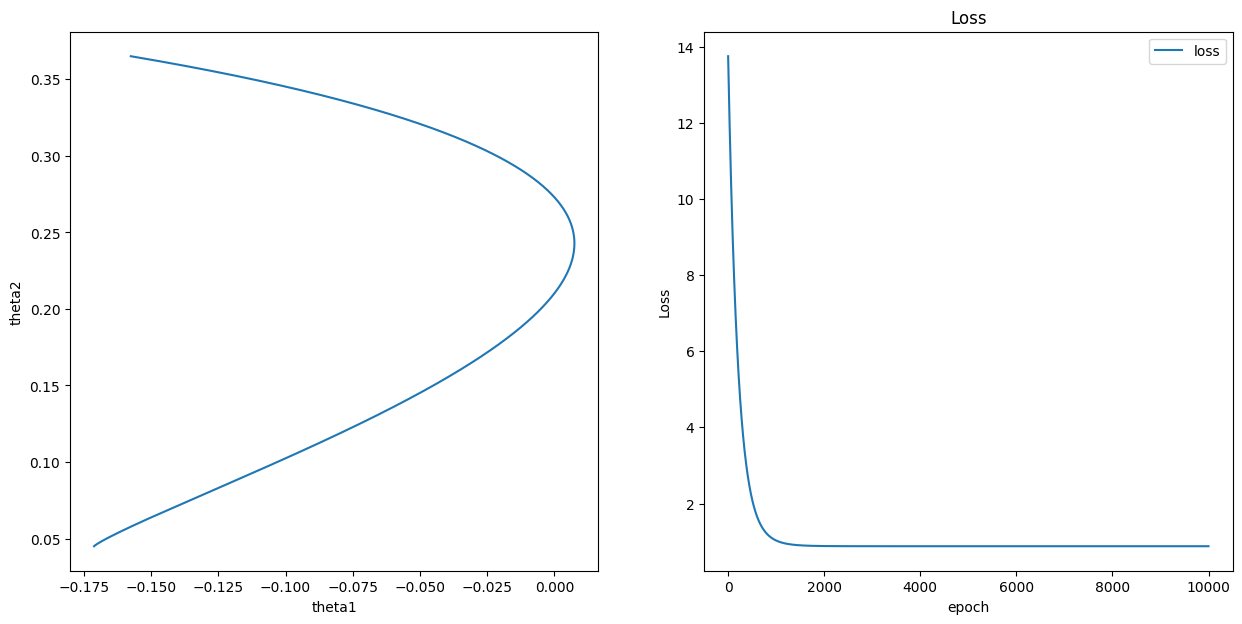

In [7]:
# 미니프로젝트 1-5
w2 = np.random.randn(D+1, 1)
#셔플을 위한 0부터 N개까지의 숫자가 있는 넘파이리스트 나중에 인덱스 끼리 체인지 할 예정

# 하이퍼파라미터
lr = 0.001
batch_size = 100
epochs = 10000
break_num=1e-6

iternum = N // batch_size +1 #딱 나눠 안떨어 질 경우
last_index=N % batch_size
print(iternum)
print(last_index)
theta1_batch=[]
theta2_batch=[]
Loss_list = []
for epoch in range(epochs):
    shuffled_numbers = np.random.permutation(numbers)
    x=x[shuffled_numbers] #셔플한 인덱스 순서대로 바꿔줌
    y=y[shuffled_numbers] #셔플한 인덱스 순서대로 바꿔줌
    for batch_index in range(iternum):
        # 현재 배치의 시작과 끝 인덱스 계산
        # import pdb; pdb.set_trace()
        start_index = batch_index * batch_size
        if(last_index!=0 and batch_index==iternum-1):
          end_index=last_index
        else:
          end_index = (batch_index + 1) * batch_size
        # 현재 배치에서 손실과 기울기 계산
        x_batch = x[start_index:end_index]
        y_batch = y[start_index:end_index]
        y_pred = x_batch.dot(w2)
        if(last_index!=0 and batch_index==iternum-1):
          batch_L = (np.sum((y_pred - y_batch) ** 2))/last_index
        else:
          batch_L = (np.sum((y_pred - y_batch) ** 2))/batch_size
        
        if(last_index!=0 and batch_index==iternum-1):
          g = -(2 / last_index) * np.dot((y_batch - y_pred).T, x_batch)
        else:
          g = -(2 / batch_size) * np.dot((y_batch - y_pred).T, x_batch)

        w2 -= lr * g.T

        theta1_batch.append(w2[0][0])
        theta2_batch.append(w2[1][0])
    
    y_pred = x.dot(w2)
    loss = np.sum(np.square(y-y_pred))/N
    Loss_list.append(loss)
    # if ((epoch > 1) and (abs(Loss_list[-2]- Loss_list[-1])) < break_num):
    #   break

print("마지막 theta1 값", theta1_batch[-1], "마지막 theta2 값",theta2_batch[-1])
fig = plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
plt.plot(theta1_batch, theta2_batch)
plt.xlabel('theta1')
plt.ylabel('theta2')

plt.subplot(1,2,2)
plt.plot(Loss_list, label='loss')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

plt.show()

-0.17014504305723133 0.04437800453514277
-0.17184923135854588 0.044750722490926084
-0.17126551001709583 0.044976726909926074


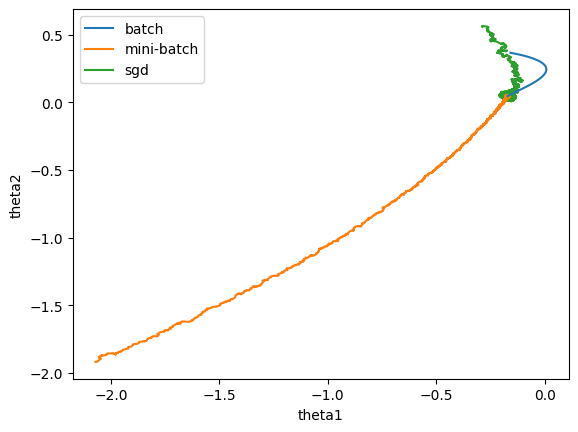

In [8]:
print(theta1_sgd[-1], theta2_sgd[-1])
print(theta1_mini[-1], theta2_mini[-1])
print(theta1_batch[-1], theta2_batch[-1])
plt.plot(theta1_batch, theta2_batch, label='batch', zorder=3)
plt.plot(theta1_mini, theta2_mini, label='mini-batch', zorder=2)
plt.plot(theta1_sgd, theta2_sgd, label='sgd', zorder=1)
plt.xlabel('theta1')
plt.ylabel('theta2')
plt.legend()